In [1]:
from pathlib import Path
import sys
import numpy as np
import pandas as pd 
import os

In [2]:
#create training set with original index 
full_array = np.load('full_array.npy')
df = pd.DataFrame(full_array, columns =['exp', 'hard', 'med','easy'] )
df_train = df.loc[df['exp'] != 0.0]
df_train['index'] = df_train.index
df_train

<ipython-input-2-a533b101bbd3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['index'] = df_train.index


,exp,hard,med,easy,index
180,218.0,1.0,0.0,0.0,180
274,218.0,1.0,0.0,0.0,274
299,218.0,1.0,6.0,1.0,299
7249,1.0,1.0,1.0,1.0,7249
7349,218.0,1.0,1.0,0.0,7349
...,...,...,...,...,...
56679,4.0,4.0,3.0,2.0,56679
56799,3.0,3.0,2.0,2.0,56799
56859,2.0,2.0,1.0,1.0,56859
56919,4.0,4.0,3.0,2.0,56919


In [3]:
#expert to hard df
df_train_1 = df_train[['index', 'exp', 'hard']]
df_train_1

,index,exp,hard
180,180,218.0,1.0
274,274,218.0,1.0
299,299,218.0,1.0
7249,7249,1.0,1.0
7349,7349,218.0,1.0
...,...,...,...
56679,56679,4.0,4.0
56799,56799,3.0,3.0
56859,56859,2.0,2.0
56919,56919,4.0,4.0


In [45]:
#expert to medium df
df_train_2 = df_train[['index', 'exp', 'med']]
#df_train_2
# df to np array
exp_to_med_arr = df_train_2.to_numpy()

In [46]:
#expert to easy df
df_train_3 = df_train[['index', 'exp', 'easy']]
#df_train_3
# df to np array
exp_to_easy_arr = df_train_3.to_numpy()

In [4]:
# df to np array
exp_to_hard_arr = df_train_1.to_numpy()
exp_to_hard_arr.shape

(1416, 3)

In [48]:
exp_to_med_arr.shape

(1416, 3)

In [5]:
#expert unique notes
exp_uniques, counts = np.unique(df_train['exp'], return_counts=True)
exp_uniques
#counts

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,  10.,  11.,  13.,  14.,
        15.,  16.,  17.,  19.,  22.,  23.,  24.,  26., 218.])

In [33]:
ref = {k: v for v, k in enumerate(exp_uniques)}
ref[0.0] = 20
ref

{1.0: 0,
 2.0: 1,
 3.0: 2,
 4.0: 3,
 5.0: 4,
 6.0: 5,
 7.0: 6,
 10.0: 7,
 11.0: 8,
 13.0: 9,
 14.0: 10,
 15.0: 11,
 16.0: 12,
 17.0: 13,
 19.0: 14,
 22.0: 15,
 23.0: 16,
 24.0: 17,
 26.0: 18,
 218.0: 19,
 0.0: 20}

In [53]:
# empty matrix from exp to hard
#exp_to_hard_matrix = np.empty((len(exp_uniques), len(exp_uniques)+1))
exp_to_hard_matrix = np.zeros(shape=(21, 21))
exp_to_med_matrix = np.zeros(shape=(20, 21))
exp_to_easy_matrix = np.zeros(shape=(20, 21))
exp_to_hard_matrix.shape
  

(21, 21)

In [70]:
#out put a dictionary of all the transformed notes
filter_indices = {}

for j in exp_uniques:

    for i in range(1416) :
        if exp_to_easy_arr[i][1] == j:
            
            if j not in filter_indices:
                filter_indices[j] = list()
            
            filter_indices[j].append(exp_to_easy_arr[i][2])



In [10]:
filter_indices

{1.0: [1.0,
  1.0,
  0.0,
  2.0,
  1.0,
  0.0,
  2.0,
  0.0,
  2.0,
  0.0,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  2.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  2.0,
  2.0,
  2.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  2.0,
  1.0,
  2.0,
  1.0,
  2.0,
  1.0,
  2.0,
  1.0,
  2.0,
  1.0,
  0.0,
  0.0,
  1.0,
  2.0,
  2.0,
  1.0,
  2.0,
  2.0,
  1.0,
  2.0,
  2.0,
  1.0,
  2.0,
  2.0,
  1.0,
  2.0,
  2.0,
  1.0,
  2.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  2.0,
  0.0,
  2.0,
  0.0,
  2.0,
  0.0,
  2.0,
  0.0,
  2.0,
  0.0,
  2.0,
  0.0,
  2.0,
  0.0,
  2.0,
  0.0,
  2.0,
  0.0,
  2.0,
  0.0,
  2.0,
  0.0,
  2.0,
  0.0,
  2.0,
  0.0,
  2.0,
  0.0,
  2.0,
  0.0,
  2.0,
  0.0,
  2.0,
  0.0,
  2.0,
  0.0,
  2.0,
  0.0,
  2.0,
 

In [71]:
#fill in the probablity matrix
for i in exp_uniques:
        
    uniques, counts = np.unique(filter_indices[int(i)], return_counts=True) 

    for u in range(len(uniques)):
        u_val = uniques[u]
        #print(int(u_val))
        prob = (counts / len(filter_indices[i]))[u]
        exp_to_easy_matrix[ref.get(int(i))][ref.get(int(u_val))] = prob
    

In [72]:
exp_to_easy_matrix

array([[0.13407821, 0.05586592, 0.03351955, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.77653631],
       [0.11969112, 0.11583012, 0.05019305, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.71428571],
       [0.15867159, 0.25830258, 0.05535055, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.52767528],
       [0.01731602, 0.11688312, 0.07792208, 0.004329  , 0.        ,
        0.        , 0.        , 0.        , 0.       

In [73]:
# save to npy file
np.save('exp_to_easy_matrix.npy', exp_to_easy_matrix)

0.4965986394557823

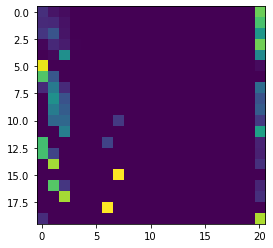

In [74]:
import matplotlib.pyplot as plt

m = np.load('exp_to_easy_matrix.npy')
#plt.figure(figsize=(20,20))
plt.imshow(m)

m[4,2]